# Exploratory Data Analysis

This file contains EDA and plots fro Airline Passenger Satisfaction

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


In [28]:
# global plots style
sns.set_theme(
    style='whitegrid',      # light background with grid
    context='notebook'      # good default sizing
)

In [29]:
# download dataset 
project_root = Path("..").resolve()
processed_dir = project_root / "data" / "processed"

df_path = processed_dir / "airlines_full.csv"


# read the data
df = pd.read_csv(df_path)
print('Data is loaded!')

Data is loaded!


## Checking the distributions

In [9]:
# prepare labels for satisfaction(0/1)
df_plot = df.copy()

if df_plot['satisfaction'].dtype != 'object':
    df_plot['satisfaction_label'] = df_plot['satisfaction'].map(
        {1: 'Satisfied', 0: 'Neutral or dissatisfied'}
    )
else:
    df_plot['satisfaction_label'] = df_plot['satisfaction']

#### Piecharts for basic passengers composition

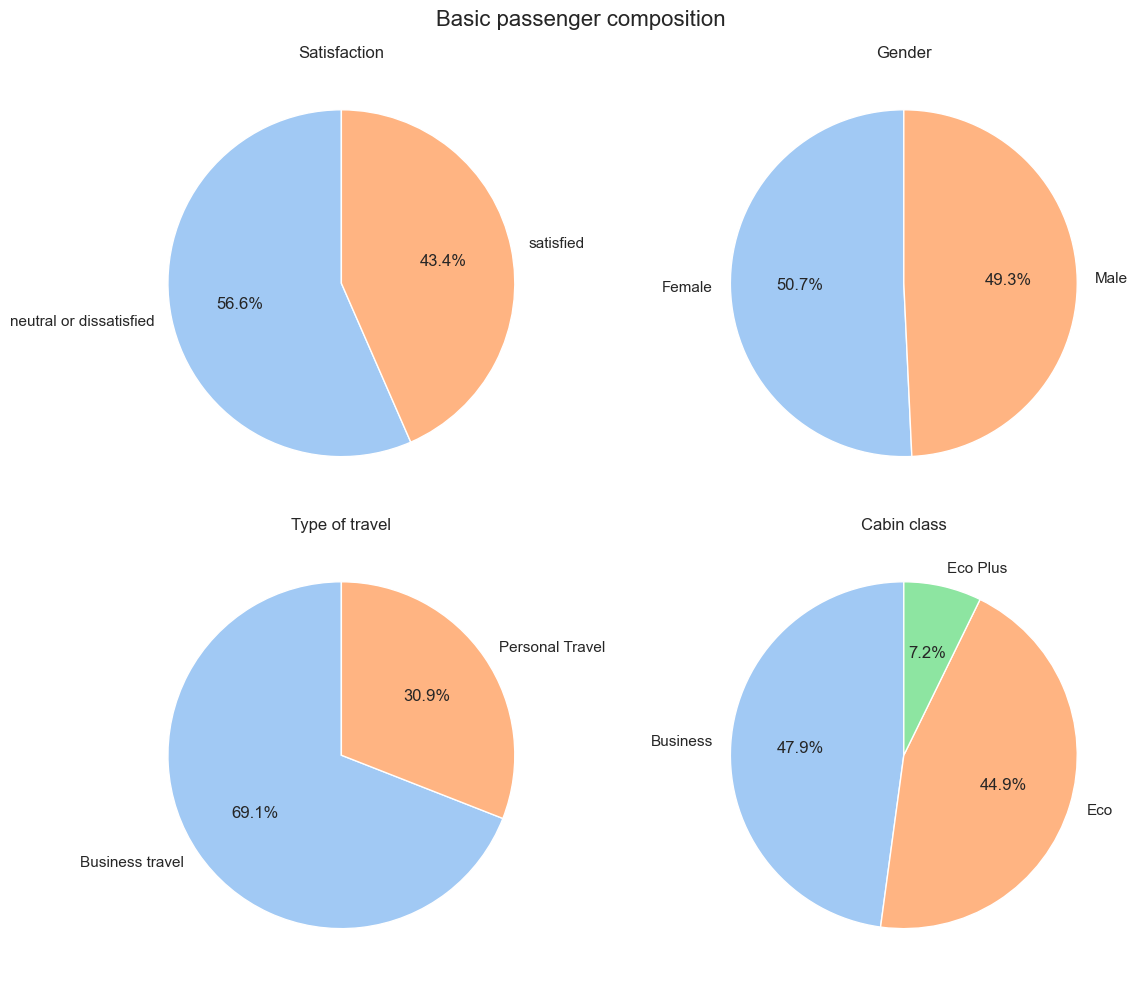

figure saved to: ..\reports\figures\basic_composition_pies.png


In [30]:
# satisfied vs others
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

colors = sns.color_palette('pastel')

# 1. Satisfaction
df_plot['satisfaction_label'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors ,
    startangle=90,
    ax=axes[0, 0]
)
axes[0, 0].set_title('Satisfaction')
axes[0, 0].set_ylabel('')

# 2. Gender
df_plot['Gender'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors= colors,
    startangle=90,
    ax=axes[0, 1]
)
axes[0, 1].set_title('Gender')
axes[0, 1].set_ylabel('')

# 3. Type of travel
df_plot['Type of Travel'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors= colors,
    startangle=90,
    ax=axes[1, 0]
)
axes[1, 0].set_title('Type of travel')
axes[1, 0].set_ylabel('')

# 4. Cabin class
df_plot['Class'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors= colors,
    ax=axes[1, 1]
)
axes[1, 1].set_title('Cabin class')
axes[1, 1].set_ylabel('')

plt.suptitle('Basic passenger composition', fontsize=16)
plt.tight_layout()

# saving
figures_dir = Path('../reports/figures')
figures_dir.mkdir(parents=True, exist_ok=True)

output_file = figures_dir / 'basic_composition_pies.png'
fig.savefig(output_file, dpi=300, bbox_inches='tight')

plt.show()
print(f'figure saved to: {output_file}')


Most passengers in this dataset are neutral or dissatisfied (56,6%), and about 43.4% percent say they are satisfied. Gender is almost evenly split, so I do not expect big effects just from that. More than two thirds of the trips are business travel (69.1%), so the data is mainly describing business flyers, not vacation trips. Cabin class is mostly Business (47.9%) and Economy (44.9%), with Eco Plus as a small group (7.2%). Overall, this looks like a business-heavy sample with enough variation in satisfaction and class to compare different passenger groups.


### Age and Distance distrigutions

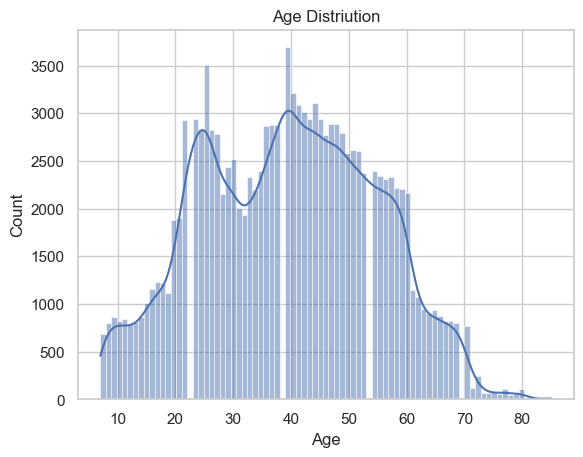

In [31]:
# Age Distribution
plt.figure()
sns.histplot(df['Age'], kde=True)
plt.title('Age Distriution')
plt.show()

In [ ]:

plt.figure(figsize=(8, 6))

# histograms by travel type
ax = sns.histplot(
    data=df,
    x='Age',
    hue='Type of Travel',
    hue_order=['Business travel', 'Personal Travel'],
    palette='pastel',
    stat='density',
    common_norm=False,
    bins=30,
    alpha=0.4,
    multiple='layer'
)

# overall curve in black
overall_line = sns.kdeplot(
    data=df,
    x='Age',
    color='black',
    linewidth=2,
    label='Overall (black line)'
)

# build custom legend 
labels = ax.get_legend_handles_labels()


# add the line handle to the list
handles = labels + [overall_line.lines[0]]

plt.title('Age distribution: business vs personal travel')
plt.xlabel('Age')
plt.ylabel('Density')

plt.legend(handles, custom_labels, title='Groups', loc='upper right')

plt.tight_layout()
plt.show()


IndentationError: unexpected indent (3297812117.py, line 28)